# 3.15 数值稳定性和模型初始化

深度模型有关数值稳定性的典型问题是衰减（vanishing）和爆炸（explosion）。

## 3.15.1 衰减和爆炸

当神经网络的层数较多时，模型的数值稳定性容易变差。假设一个层数为$L$的多层感知机的第$l$层$H^{(l)}$的权重参数为$W^{(l)}$，输出层$H^{(L)}$的权重参数为$W^{(L)}$。为了便于讨论，不考虑偏差参数，且设所有隐藏层的激活函数为恒等映射（identity mapping）$\phi(x)=x$。给定输入$X$，多层感知机的第$l$层的输出$H^{(l)}$=$XW^{(1)}W^{(2)}…W^{(l)}$。此时，如果层数$l$较大，$H^{(l)}$的计算可能会出现衰减或爆炸。举个例子，假设输入和所有层的权重参数都是标量，如权重参数为0.2和5，多层感知机的第30层输出为输入$X$分别与$0.2^{30}≈1×10^{−21}$（衰减）和$5^{30}≈9×10^{20}$（爆炸）的乘积。类似地，当层数较多时，梯度的计算也更容易出现衰减或爆炸。

## 3.15.2 随机初始化模型参数

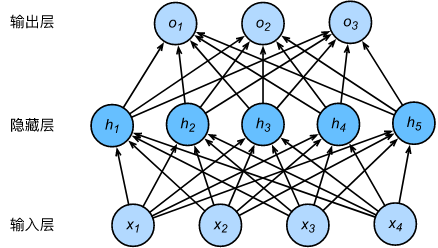

假设输出层只保留一个输出单元$o_1$（删去$o_2$和$o_3$以及指向它们的箭头），且隐藏层使用相同的激活函数。如果将每个隐藏单元的参数都初始化为相等的值，那么在正向传播时每个隐藏单元将根据相同的输入计算出相同的值，并传递至输出层。在反向传播中，每个隐藏单元的参数梯度值相等。因此，这些参数在使用基于梯度的优化算法迭代后值依然相等。之后的迭代也是如此。在这种情况下，无论隐藏单元有多少，隐藏层本质上只有1个隐藏单元在发挥作用。因此，正如在前面的实验中所做的那样，我们通常将神经网络的模型参数，特别是权重参数，进行随机初始化。

### 3.15.2.1 PyTorch 的默认随机初始化

随机初始化模型参数的方法有很多。在线性回归的简洁实现中，使用$torch.nn.init.normal_()$使模型$net$的权重参数采用正态分布的随机初始化方式。不过，$PyTorch$中$nn.Module$的模块参数都采取了较为合理的初始化策略（不同类型的layer具体采样的哪一种初始化方法的可参考源代码），因此一般不用我们考虑。

### 3.15.2.2 Xavier 随机初始化

假设某全连接层的输入个数为$a$，输出个数为$b$，Xavier随机初始化将使该层中权重参数的每个元素都随机采样于均匀分布:$$U(-\sqrt{\frac{6}{a+b}},\sqrt{\frac{6}{a+b}})$$

它的设计主要考虑到，模型参数初始化后，每层输出的方差不该受该层输入个数影响，且每层梯度的方差也不该受该层输出个数影响。

参考文档：
[1] Glorot, X., & Bengio, Y. (2010, March). Understanding the difficulty of training deep feedforward neural networks. In Proceedings of the thirteenth international conference on artificial intelligence and statistics (pp. 249-256).